# Task 1   Prediction using Supervised **ML**

In [17]:
# Importing Numpy library for working with arrays
# Importing Pandas library for working on dataframes
# Importing Seaborn and Matplotlib libraries for working with graphical visualizations

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [18]:
# Importing data from Github using pandas library

data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
# Visualizing first five rows of imported data

data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Creating two separate dataframes from data, HOURS as x (Features set), and SCORES as y (Depenent data set)

x = data[['Hours']]
y = data[['Scores']]

In [5]:
# Spliting x and y dataframes into training and test set using scikit learn library
# Training set kept as 67% and test set as 33%

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [6]:
#Viewing the Training data set

train_set = pd.DataFrame({'X_Train (Hours)':x_train.values.flatten(),'Y_Train (Score)':y_train.values.flatten()},index = np.arange(0,16,1))
train_set

,X_Train (Hours),Y_Train (Score)
0,1.5,20
1,3.2,27
2,4.5,41
3,8.9,95
4,8.5,75
5,3.5,30
6,2.7,30
7,1.9,24
8,4.8,54
9,6.1,67


In [7]:
#Viewing the Test data set

test_set = pd.DataFrame({'X_Test (Hours)':x_test.values.flatten(),'Y_test (Score)':y_test.values.flatten()},index = np.arange(0,9,1))
test_set

,X_Test (Hours),Y_test (Score)
0,8.3,81
1,2.5,30
2,2.5,21
3,6.9,76
4,5.9,62
5,2.7,25
6,3.3,42
7,5.1,47
8,3.8,35


In [8]:
# Creating a Linear regression model using scikit learn library

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [9]:
# Training the model on training data i.e. x_train and y_train

lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Executing the trained model on x_test data i.e. Hours and viewing the predicted scores

y_predict = lr.predict(x_test)
y_predict

array([[83.50244409],
       [27.53075726],
       [27.53075726],
       [69.99203692],
       [60.34174609],
       [29.46081542],
       [35.25098992],
       [52.62151342],
       [40.07613534]])

In [11]:
# Tabular Comparison of Actual score (y_test) with the predicted scores (y_predict) for a common Hours of study i.e x_test

comp = pd.DataFrame({'Hours of study (x_test)':x_test.values.flatten(),'Actual Scores (y_test)':y_test.values.flatten(),'Predicted Scores (y_predictredict)':y_predict.flatten()},index=np.arange(0,9,1))
comp

,Hours of study (x_test),Actual Scores (y_test),Predicted Scores (y_predictredict)
0,8.3,81,83.502444
1,2.5,30,27.530757
2,2.5,21,27.530757
3,6.9,76,69.992037
4,5.9,62,60.341746
5,2.7,25,29.460815
6,3.3,42,35.250990
7,5.1,47,52.621513
8,3.8,35,40.076135


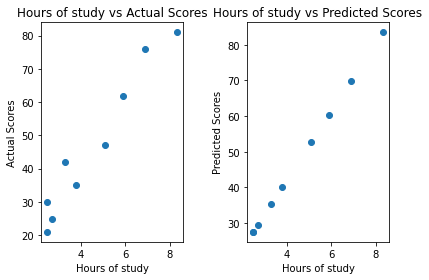

In [12]:
# Visual Comparison of Hours of study(x_test) vs Actual Scores(y_test) AND Hours of study(x_test) vs Predicted Scores(y_predict)


plt.subplot(1,2,1)
plt.scatter(x_test,y_test)
plt.xlabel('Hours of study')
plt.ylabel('Actual Scores')
plt.title('Hours of study vs Actual Scores')


plt.subplot(1,2,2)
plt.scatter(x_test,y_predict)
plt.xlabel('Hours of study')
plt.ylabel('Predicted Scores')
plt.title('Hours of study vs Predicted Scores')

plt.tight_layout()

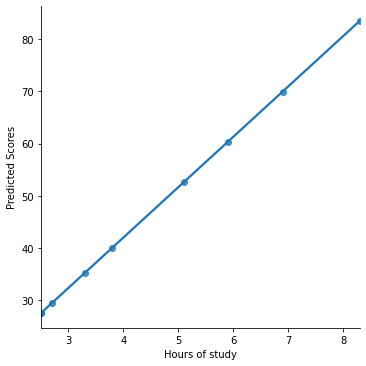

In [13]:
# Viewing Linear regression plot Hours of Study (x_test) v/s Predicted Score (y_predict)

conv_arr= x_test.values
data1 = pd.DataFrame({'Hours of study':x_test.values.flatten(),'Predicted Scores':y_predict.flatten()},index = np.arange(0,9,1))
sns.lmplot(x='Hours of study',y='Predicted Scores',data=data1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


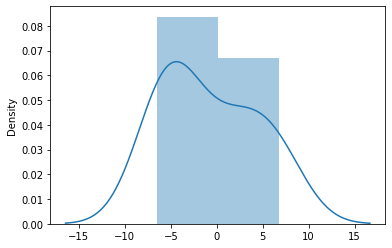

In [14]:
#Ploting the difference of true marks and predicted marks as distribution plot

sns.distplot(y_test-y_predict)

In [15]:
# Predicting the marks for 9.25 hrs of study per day

print(lr.predict([[9.25]]))

# Score predicted  for 9.25 hours of study is approximately 92

[[92.67022038]]
